In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] =11,5
plt.rcParams['figure.dpi'] =100


In [31]:
mp=pd.read_csv("Dataset/1990-2021.csv", skipfooter=1, usecols=["Date", "United States(USD)","India(INR)"])

<ipython-input-31-f5d9d4271205>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  mp=pd.read_csv("Dataset/1990-2021.csv", skipfooter=1, usecols=["Date", "United States(USD)","India(INR)"])


In [32]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                378 non-null    object 
 1   United States(USD)  378 non-null    float64
 2   India(INR)          378 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.0+ KB


In [33]:
mp.rename(columns = {"India(INR)": "INR_g", "United States(USD)":"USD_g"}, inplace=True)

In [34]:
mp.Date= pd.to_datetime(mp.Date)

In [35]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    378 non-null    datetime64[ns]
 1   USD_g   378 non-null    float64       
 2   INR_g   378 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.0 KB


In [36]:
mp

,Date,USD_g,INR_g
0,1990-01-31,415.1,7041.0
1,1990-02-28,407.7,6957.4
2,1990-03-30,368.5,6334.4
3,1990-04-30,367.8,6379.3
4,1990-05-31,363.1,6295.5
...,...,...,...
373,2021-02-26,1742.9,128073.3
374,2021-03-31,1691.1,123639.0
375,2021-04-30,1767.7,130934.3
376,2021-05-31,1900.0,137979.1


In [37]:
usd=pd.read_csv("Dataset/usdinr_m.csv", skipfooter=4, usecols=["Date","Close"])

<ipython-input-37-8947f13c7075>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  usd=pd.read_csv("Dataset/usdinr_m.csv", skipfooter=4, usecols=["Date","Close"])


In [38]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    378 non-null    object 
 1   Close   378 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.0+ KB


In [39]:
usd.Date=pd.to_datetime(usd.Date)

In [40]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    378 non-null    datetime64[ns]
 1   Close   378 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 KB


In [41]:
usd.rename(columns = {"Close": "USD_d"}, inplace=True)

In [42]:
usd

,Date,USD_d
0,1990-01-31,16.9000
1,1990-02-28,17.0000
2,1990-03-31,17.2000
3,1990-04-30,17.3000
4,1990-05-31,17.3000
...,...,...
373,2021-02-28,73.7380
374,2021-03-31,73.1050
375,2021-04-30,74.0750
376,2021-05-31,72.6175


In [43]:
mp

,Date,USD_g,INR_g
0,1990-01-31,415.1,7041.0
1,1990-02-28,407.7,6957.4
2,1990-03-30,368.5,6334.4
3,1990-04-30,367.8,6379.3
4,1990-05-31,363.1,6295.5
...,...,...,...
373,2021-02-26,1742.9,128073.3
374,2021-03-31,1691.1,123639.0
375,2021-04-30,1767.7,130934.3
376,2021-05-31,1900.0,137979.1


In [44]:
allprice= pd.merge(mp,usd, how="inner", on="Date")

In [45]:
allprice.tail()

,Date,USD_g,INR_g,USD_d
265,2020-12-31,1887.6,137922.2,73.0230
266,2021-03-31,1691.1,123639.0,73.1050
267,2021-04-30,1767.7,130934.3,74.0750
268,2021-05-31,1900.0,137979.1,72.6175
269,2021-06-30,1763.2,131054.9,74.3240


In [60]:
allprice.set_index("Date",inplace=True)

In [61]:
allprice['USD_g']= allprice["USD_g"]*allprice["USD_d"]

In [62]:
allprice

,USD_g,INR_g,USD_d
Date,,,
1990-01-31,1.185567e+05,7041.0,16.9000
1990-02-28,1.178253e+05,6957.4,17.0000
1990-04-30,1.100789e+05,6379.3,17.3000
1990-05-31,1.086722e+05,6295.5,17.3000
1990-07-31,1.114257e+05,6457.2,17.3000
...,...,...,...
2020-12-31,1.006536e+07,137922.2,73.0230
2021-03-31,9.037815e+06,123639.0,73.1050
2021-04-30,9.699557e+06,130934.3,74.0750


In [63]:
xticks=[i for i in range(1990,2022,5)]

In [64]:
xticks

[1990, 1995, 2000, 2005, 2010, 2015, 2020]

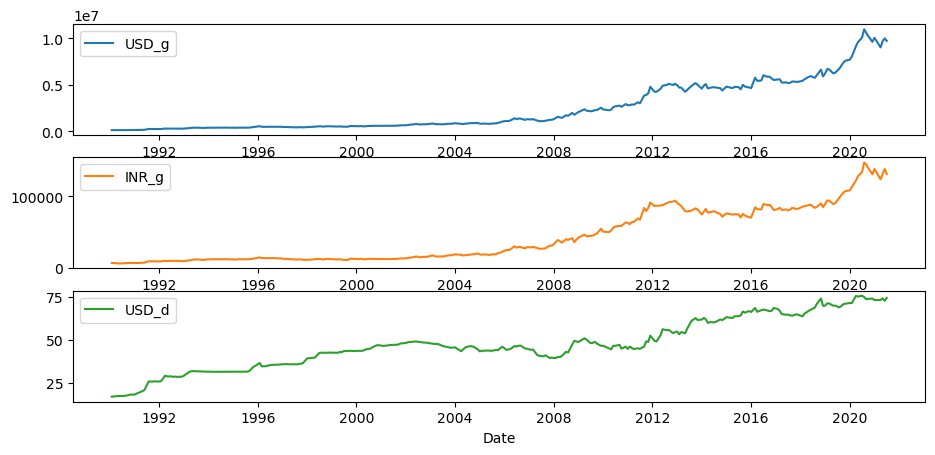

In [67]:
allprice.plot(subplots=True, sharex= False, sharey=False)
plt.show()

In [81]:
btc=pd.read_csv("Dataset/BTC.csv", usecols=["Date", "Price"])

In [82]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    135 non-null    object
 1   Price   135 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [83]:
btc

,Date,Price
0,Oct 21,"47,575.7"
1,Sep 21,"43,823.3"
2,Aug 21,"47,130.4"
3,Jul 21,"41,553.7"
4,Jun 21,"35,026.9"
...,...,...
130,Dec 10,0.3
131,Nov 10,0.2
132,Oct 10,0.2
133,Sep 10,0.1


In [84]:
import datetime
btc.Date=btc.Date.apply(lambda x: datetime.datetime.strptime(x,'%b %y').strftime('%d-%m-%Y'))

In [85]:
btc

,Date,Price
0,01-10-2021,"47,575.7"
1,01-09-2021,"43,823.3"
2,01-08-2021,"47,130.4"
3,01-07-2021,"41,553.7"
4,01-06-2021,"35,026.9"
...,...,...
130,01-12-2010,0.3
131,01-11-2010,0.2
132,01-10-2010,0.2
133,01-09-2010,0.1
